In [ ]:
import pandas as pd
import numpy as np
from scikit_alarm_framework.alarm_generator import set_point
from graphviz import Digraph


In [18]:
import seaborn as sns
sns.set()

In [2]:
from matplotlib import pyplot as plt
import TransEntropy_mod as te

GitHub user········
GitHub password········
Requirement already up-to-date: pip in /home/rute/anaconda3/lib/python3.7/site-packages (18.1)


/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


In [3]:
#-----------geracao dos alarmes para novo dataset----

#data processo
dist6_novo_proc = pd.read_csv("resultados_defesa/dist6_1_10.csv", index_col='TOUT',usecols= ['TOUT']+['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]])


thresh_high = [0.284,3711.109,4514.069,48.235,2803.033,66.505,122.932,102.527]
thresh_low =  [0.249,3597.394,4371.271,46.954,2796.971,63.494,122.867,102.409]


#--------------geracao dos alarmes------------
high_alarms = set_point.generate(dist6_novo_proc, thresh_high)
low_alarms = set_point.generate(dist6_novo_proc, thresh_low, high=False)

#------------------renomenado as colunas-------------

high_names = ['x%01d_high' % var for var in [1,2,3,6,7,8,9,21]]
low_names =  ['x%01d_low'  % var for var in [1,2,3,6,7,8,9,21]]

rename_high = {key:value for key, value in zip(high_alarms.columns,high_names)}
rename_low = {key:value for key, value in zip(low_alarms.columns,low_names)}

high_alarms = high_alarms.rename(rename_high, axis='columns')
low_alarms = low_alarms.rename(rename_low, axis='columns')

#----------------------contenando os dois tipos de alrme---------------

dist6_novo_alm =  pd.concat([high_alarms, low_alarms], axis=1)
dist6_novo_alm.to_csv('resultados_defesa/dist6_novo_alm.csv')

In [5]:

dist6_novo_alm.index= pd.to_datetime(dist6_novo_alm.index, unit='s')


In [35]:
dist6_novo_alm_5 = te.apply_roll_mean(dist6_novo_alm,5)

In [21]:

df_te_11_50 = pd.read_csv("resultados_defesa/df_te_novo50_k1l1.csv", index_col=0)


names = high_names+low_names
rename = {key:value for key, value in zip(df_te_11_50.columns,names)}
df_te_11_50.rename(rename, axis='columns')

,x1_high,x2_high,x3_high,x6_high,x7_high,x8_high,x9_high,x21_high,x1_low,x2_low,x3_low,x6_low,x7_low,x8_low,x9_low,x21_low
x1_high,0.000000,0.0,0.0,0.0,0.014244,0.002594,0.004628,0.022142,0.000000,0.0,0.0,0.015318,0.020144,0.0,0.000492,0.040077
x2_high,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
x3_high,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
x6_high,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
x7_high,0.022084,0.0,0.0,0.0,0.000000,0.005761,0.001103,0.070177,0.009458,0.0,0.0,0.010525,0.000000,0.0,0.002072,0.022403
x8_high,0.001267,0.0,0.0,0.0,0.002341,0.000000,0.000729,0.007954,0.000597,0.0,0.0,0.000894,0.000682,0.0,0.000909,0.002308
x9_high,0.003280,0.0,0.0,0.0,0.027080,0.006717,0.000000,0.041779,0.001519,0.0,0.0,0.009955,0.001304,0.0,0.000000,0.022725
x21_high,0.104455,0.0,0.0,0.0,0.063463,0.007266,0.038139,0.000000,0.013941,0.0,0.0,0.073677,0.075054,0.0,0.001238,0.000000
x1_low,0.000000,0.0,0.0,0.0,0.023824,0.005081,0.026288,0.016892,0.000000,0.0,0.0,0.047691,0.008837,0.0,0.000638,0.005113
x2_low,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


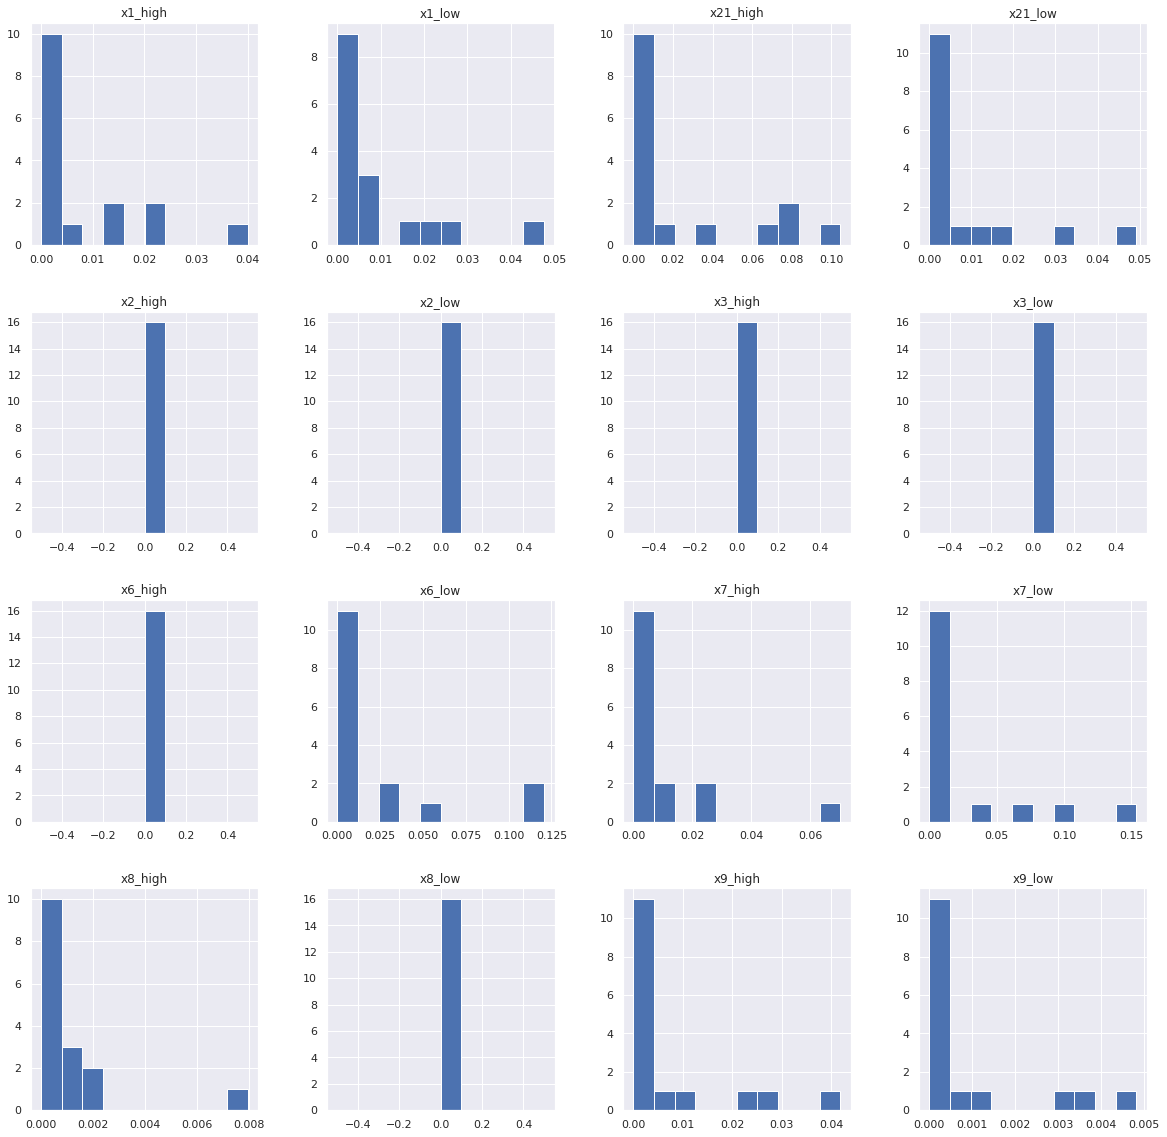

In [22]:
(df_te_11_50.transpose()).hist(figsize=(20,20))
plt.show()

In [24]:
df_te_11_50 = pd.read_csv("resultados_defesa/df_te_novo50_k1l1.csv",index_col=0)
df_te_lag_11_50 = pd.read_csv("resultados_defesa/df_lags_novo50_k1l1.csv", index_col=0)

In [25]:
names = high_names+low_names
rename = {key:value for key, value in zip(df_te_11_50.columns,names)}
df_te_11_50.rename(rename, axis='columns')
df_te_lag_11_50.rename(rename, axis='columns')

,x1_high,x2_high,x3_high,x6_high,x7_high,x8_high,x9_high,x21_high,x1_low,x2_low,x3_low,x6_low,x7_low,x8_low,x9_low,x21_low
x1_high,0.0,1.0,1.0,1.0,46.0,4.0,20.0,49.0,0.0,1.0,1.0,10.0,49.0,1.0,15.0,49.0
x2_high,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
x3_high,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
x6_high,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
x7_high,49.0,1.0,1.0,1.0,0.0,4.0,17.0,42.0,49.0,1.0,1.0,11.0,0.0,1.0,15.0,32.0
x8_high,49.0,1.0,1.0,1.0,34.0,0.0,13.0,45.0,13.0,1.0,1.0,20.0,49.0,0.0,24.0,23.0
x9_high,49.0,1.0,1.0,1.0,42.0,7.0,0.0,48.0,49.0,1.0,1.0,10.0,49.0,1.0,0.0,8.0
x21_high,49.0,1.0,1.0,1.0,49.0,49.0,49.0,0.0,49.0,1.0,1.0,31.0,29.0,1.0,49.0,0.0
x1_low,0.0,1.0,1.0,1.0,49.0,49.0,49.0,49.0,0.0,1.0,1.0,32.0,49.0,1.0,36.0,5.0
x2_low,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
h = np.histogram(df_te_11_50.values)
h

(array([227,  11,   5,   3,   5,   0,   2,   2,   0,   1]),
 array([0.        , 0.01537401, 0.03074801, 0.04612202, 0.06149603,
        0.07687004, 0.09224404, 0.10761805, 0.12299206, 0.13836606,
        0.15374007]))

In [28]:
values = df_te_11_50.values
t = np.mean(values) + 3*np.std(values)
t

0.06907470805493252

In [29]:
q3 = np.percentile(df_te_11_50.values, 75)
q1 = np.percentile(df_te_11_50.values, 25)
t = q3 + 1.5*(q3-q1)
t

0.003969600443721928

In [30]:
np.histogram(values, bins=20)

(array([213,  14,   6,   5,   3,   2,   3,   0,   2,   3,   0,   0,   0,
          2,   0,   2,   0,   0,   0,   1]),
 array([0.        , 0.007687  , 0.01537401, 0.02306101, 0.03074801,
        0.03843502, 0.04612202, 0.05380902, 0.06149603, 0.06918303,
        0.07687004, 0.08455704, 0.09224404, 0.09993105, 0.10761805,
        0.11530505, 0.12299206, 0.13067906, 0.13836606, 0.14605307,
        0.15374007]))

In [31]:
q3

0.0015878401774887714

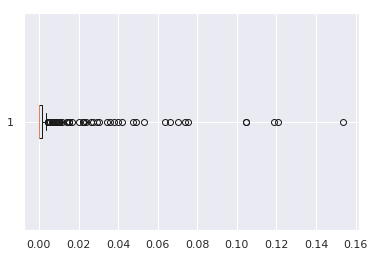

In [32]:
plt.boxplot(df_te_11_50.values.reshape(256),vert=False)
plt.show()

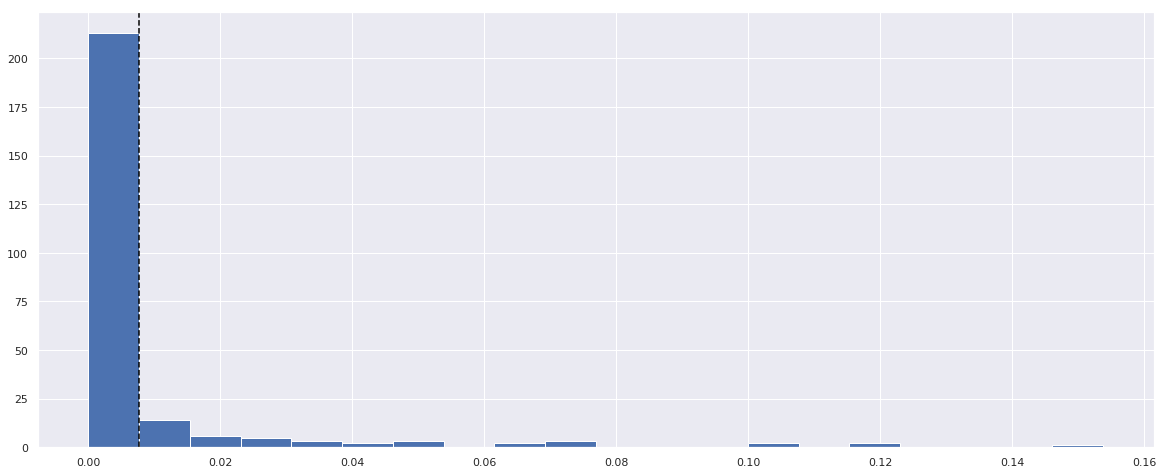

In [33]:

# plt.boxplot(df_te_11_50.values.reshape(256),vert=False)
# plt.show()
plt.figure(figsize=(20,8))
plt.hist(df_te_11_50.values.reshape(256), bins=20)
plt.axvline(0.007687,color='black',ls='--')
# plt.axvline(0.015,color='black')


plt.show()

In [36]:
result = te.apply_methodlogy(df_te_11_50, df_te_lag_11_50,dist6_novo_alm_5, 0.007687,0.5)

/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


here  x6_low x1_high
here  x9_high x7_high
here  x6_low x8_high
here  x6_low x9_high
here  x1_low x21_high
here  x21_high x6_low
here  x21_high x7_low
here  x9_high x21_low


In [20]:
result_quartil = te.apply_methodlogy(df_te_11_50, df_te_lag_11_50,dist6_novo_alm_5, t,1)

/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


here  x9_low x1_high
here  x9_low x1_high
here  x9_low x7_high
here  x9_low x7_high
here  x9_low x8_high
here  x9_low x8_high
here  x9_low x8_high
here  x9_low x9_high
here  x9_low x9_high
here  x1_low x21_high
here  x9_low x6_low
here  x9_low x7_low
here  x9_low x21_low
here  x9_low x21_low
here  x9_low x21_low


/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


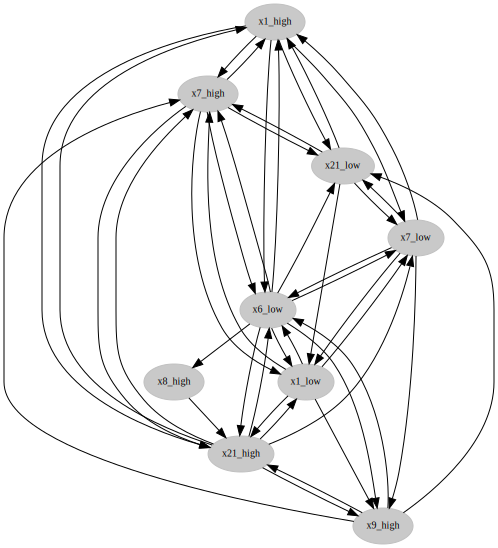

In [38]:
te_acy = te.generate_aciclic_graph(te.generate_df_valid_corrs(df_te_11_50,0.007687).values)
df_acy = pd.DataFrame(data=te_acy, columns=df_te_11_50.columns, index=df_te_11_50.columns)
graph_simple(te.generate_df_valid_corrs(df_te_11_50,0.007687))

In [33]:
def graph_simple(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    in_graph = []
    for k, row in enumerate(df.index):
        if any(df.loc[row]):
            g.node(str(row),row, shape='oval', fontsize='10', width='0', style='filled', fillcolor='#c9c9c9', color="gray")
            in_graph.append(row)

              
    for c, col in enumerate(df.columns):
        if any(df[col]):
            if col not in in_graph:
                g.node(str(col), col, shape='oval', fontsize='10', width='0', style='filled', fillcolor='#c9c9c9', color="gray") 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df.index):
            if(df[col][i]):
                g.edge(str(row), str(col), label=str(""), style= edge_style, color='black')  
    return g 

In [23]:
te.graph_simple(result)

NameError: name 'result' is not defined

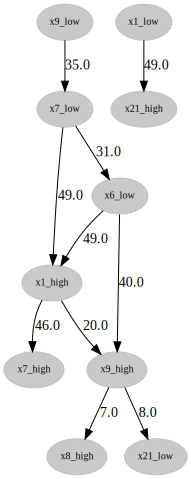

In [17]:
te.graph_simple(result_quartil)


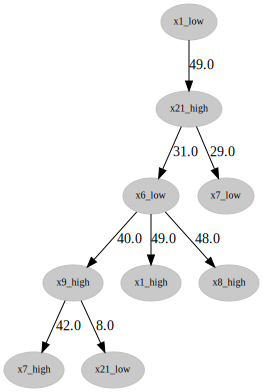

In [20]:
te.graph_simple(result)